#Yulu - Case Study

Aim/Objective :- To analyze and identify the key factors influencing the demand for shared electric cycles provided by Yulu in the Indian market. The findings will offer insights into optimizing Yulu's operations and strategies for improving revenue, ensuring a more efficient, affordable, and sustainable micro-mobility solution for users.


##Column Profiling:

datetime: datetime

season: season (1: spring, 2: summer, 3: fall, 4: winter)

holiday: whether day is a holiday or not

workingday: if day is neither weekend nor holiday is 1, otherwise is 0.

weather:

1: Clear, Few clouds, partly cloudy, partly cloudy

2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist

3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds

4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog

temp: temperature in Celsius

atemp: feeling temperature in Celsius

humidity: humidity

windspeed: wind speed

casual: count of casual users

registered: count of registered users

count: count of total rental bikes including both casual and registered

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df=pd.read_csv('bike_sharing.csv')
df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [ ]:
df.tail()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
10881,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336
10882,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241
10883,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168
10884,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,129
10885,2012-12-19 23:00:00,4,0,1,1,13.12,16.665,66,8.9981,4,84,88


In [ ]:
df['datetime']=pd.to_datetime(df['datetime'])

In [ ]:
df['count'].sum()

2085476

In [ ]:
df_2011=df[(df['datetime'].dt.year==2011)]
total_rentals=df_2011['count'].sum()
print('Total Rentals in 2011:',total_rentals)

Total Rentals in 2011: 781979


In [ ]:
df_2012=df[(df['datetime'].dt.year==2012)]
total_rentals=df_2012['count'].sum()
print('Total Rentals in 2012:',total_rentals)

Total Rentals in 2012: 1303497


Total Rentals - 2085476

Total Rentals in 2011 - 781979

Total Rentals in 2012 - 1303497

In [ ]:
df.shape

(10886, 12)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    10886 non-null  datetime64[ns]
 1   season      10886 non-null  int64         
 2   holiday     10886 non-null  int64         
 3   workingday  10886 non-null  int64         
 4   weather     10886 non-null  int64         
 5   temp        10886 non-null  float64       
 6   atemp       10886 non-null  float64       
 7   humidity    10886 non-null  int64         
 8   windspeed   10886 non-null  float64       
 9   casual      10886 non-null  int64         
 10  registered  10886 non-null  int64         
 11  count       10886 non-null  int64         
dtypes: datetime64[ns](1), float64(3), int64(8)
memory usage: 1020.7 KB


In [ ]:
df.nunique()

,0
datetime,10886
season,4
holiday,2
workingday,2
weather,4
temp,49
atemp,60
humidity,89
windspeed,28
casual,309


Statistical summary of the data

In [ ]:
df.describe()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,10886,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2011-12-27 05:56:22.399411968,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
min,2011-01-01 00:00:00,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2011-07-02 07:15:00,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,2012-01-01 20:30:00,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,2012-07-01 12:45:00,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,2012-12-19 23:00:00,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000
std,NaN,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454


Univariate Analysis


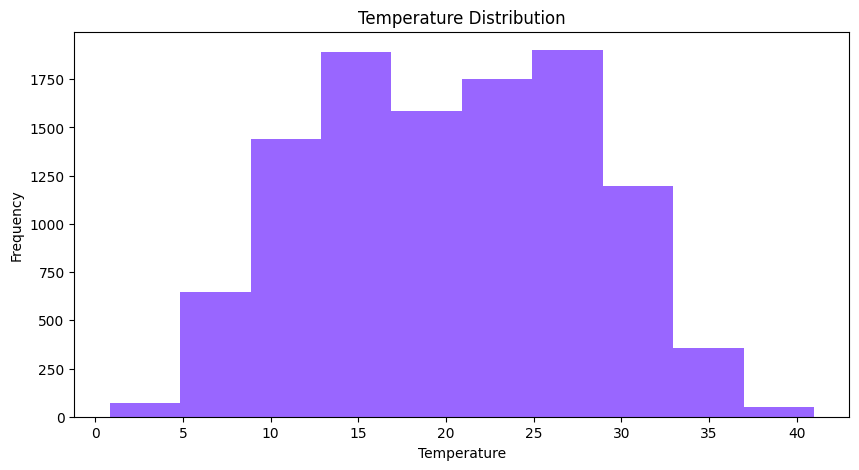

In [ ]:
#Histogram
plt.figure(figsize=(10,5))
plt.hist(df['temp'], color='#9966ff')
plt.title('Temperature Distribution')
plt.xlabel('Temperature')
plt.ylabel('Frequency')
plt.show()

Inference from this Histogram
Temperature Range:

The temperature in the dataset ranges roughly from 0°C to 40°C.

The distribution of temperatures are approximately symmetric with a bell-shaped curve. This means that temperatures are normally distributed.

The most frequent temperature values fall between 20°C and 30°C.

Temperatures below 5°C and above 35°C are relatively rare, with very few occurrences.

The histogram indicates that the temperature data is mostly concentrated in the moderate to warm range (10°C to 30°C), which could reflect a location with a temperate climate.

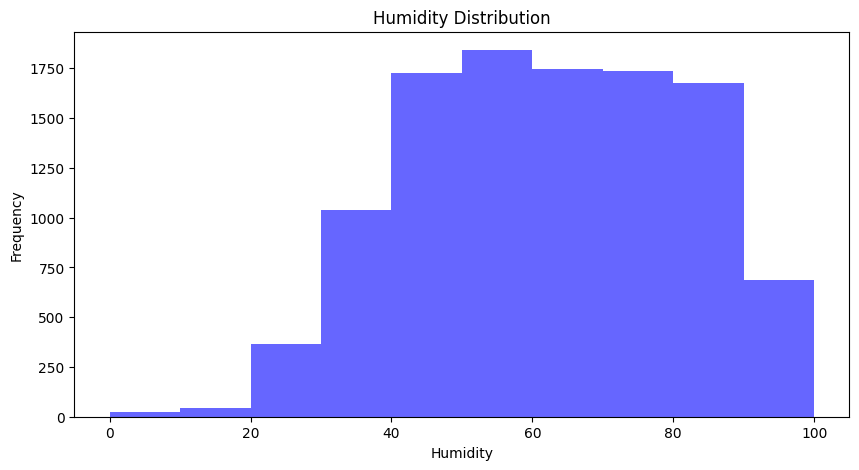

In [ ]:
plt.figure(figsize=(10,5))
plt.hist(df['humidity'], color='#6666ff')
plt.title('Humidity Distribution')
plt.xlabel('Humidity')
plt.ylabel('Frequency')
plt.show()

Humidity Distribution

The Humidity ranges from 0 to 100

The shape of the distribution is slightly right-skewed. There is a higher concentration of observations in the mid to high humidity ranges.

The highest frequency is observed in the humidity range of 50% to 80%, with the peak around 60%.

Humidity values below 20% and above 90% are less common.

The majority of the data falls between 40% and 90%, indicating that the observed conditions are generally in a moderately humid to highly humid environment.


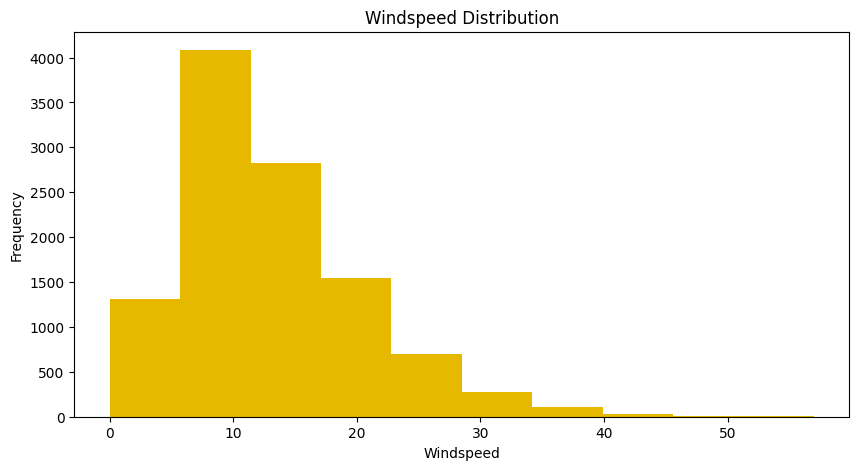

In [ ]:
plt.figure(figsize=(10,5))
plt.hist(df['windspeed'], color='#e6b800')
plt.title('Windspeed Distribution')
plt.xlabel('Windspeed')
plt.ylabel('Frequency')
plt.show()

Windspeed Distribution

Windspeed Ranges from 0 - 50 approximately

The distribution is Left Skewed and most of the values are concentrated at the left side which means there is a higher concentration of observations in the low to mid windspeed ranges.

The highest windspeed is observed in the range of 7km/h - 18km/h with 10km/h being the peak




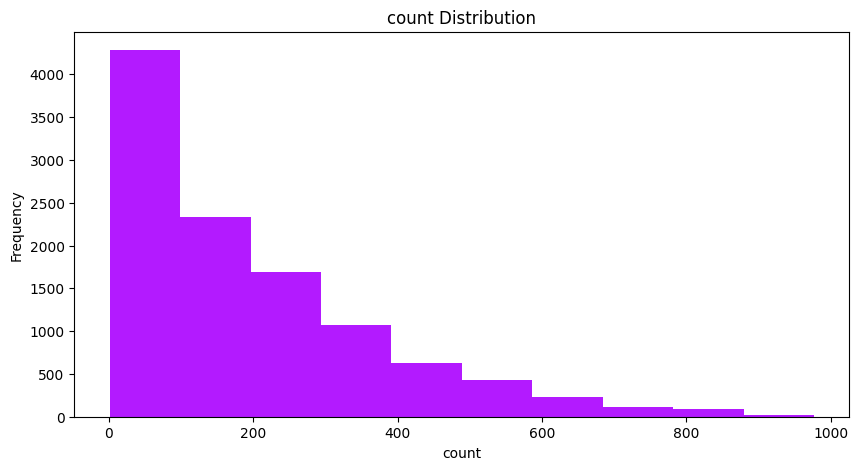

In [ ]:
plt.figure(figsize=(10,5))
plt.hist(df['count'],color='#b31aff')
plt.title('count Distribution')
plt.xlabel('count')
plt.ylabel('Frequency')
plt.show()

Count Distribution

count of rental bikes Ranges from 0 - 1000 approximately

The distribution is Left Skewed and most of the values are concentrated at the left side which means there is a higher concentration of observations in the low to mid count ranges.

The highest count is observed in the range of 1 - 100 rentals




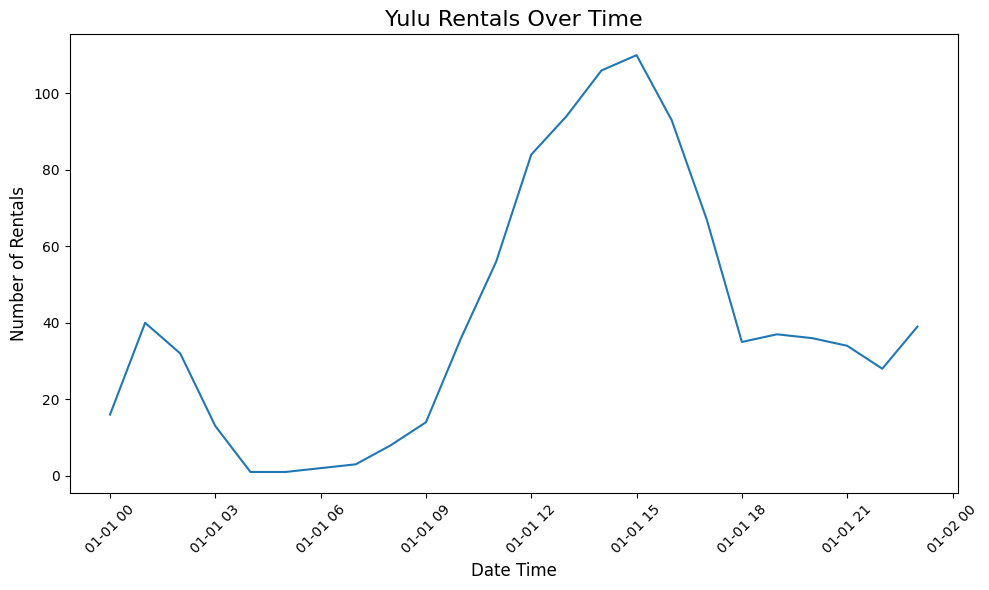

In [ ]:
#Line graph of rentals in a single day (2011-01-01)
df_jan=df[(df['datetime']>='2011-01-01') & (df['datetime']<'2011-01-02')]
plt.figure(figsize=(10, 6))
plt.plot(df_jan['datetime'], df_jan['count'])
plt.title('Yulu Rentals Over Time', fontsize=16)
plt.xlabel('Date Time', fontsize=12)
plt.ylabel('Number of Rentals', fontsize=12)
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

The Line graphs shows that there is a significant peak in rental bikes in afternoon (from 12pm to 4pm).

Count Distribution


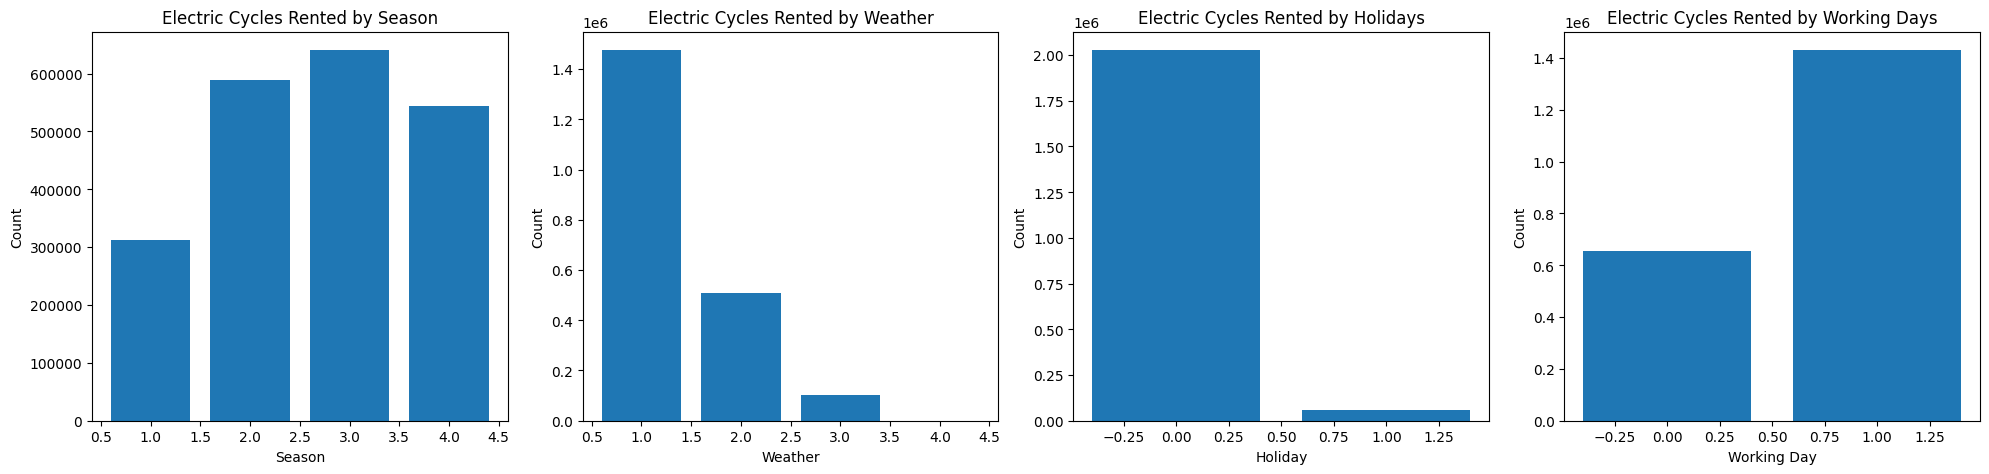

In [ ]:
season_counts = df.groupby('season')['count'].sum()
weather_counts = df.groupby('weather')['count'].sum()
holiday_counts = df.groupby('holiday')['count'].sum()
workingday_counts = df.groupby('workingday')['count'].sum()

# Create subplots
plt.figure(figsize=(20, 5))

# Bar plot for 'season'
plt.subplot(1, 4, 1)
plt.bar(season_counts.index, season_counts.values)
plt.title('Electric Cycles Rented by Season')
plt.xlabel('Season')
plt.ylabel('Count')

# Bar plot for 'weather'
plt.subplot(1, 4, 2)
plt.bar(weather_counts.index, weather_counts.values)
plt.title('Electric Cycles Rented by Weather')
plt.xlabel('Weather')
plt.ylabel('Count')

# Bar plot for 'holiday'
plt.subplot(1, 4, 3)
plt.bar(holiday_counts.index, holiday_counts.values)
plt.title('Electric Cycles Rented by Holidays')
plt.xlabel('Holiday')
plt.ylabel('Count')

# Bar plot for 'workingday'
plt.subplot(1, 4, 4)
plt.bar(workingday_counts.index, workingday_counts.values)
plt.title('Electric Cycles Rented by Working Days')
plt.xlabel('Working Day')
plt.ylabel('Count')

# Show the plots
plt.tight_layout()
plt.show()

Insights from Bar plots

1. From the first plot, it is seen that the Rentals go up in Fall season and
the lowest rentals were at spring season

2. From the second plot, it it seen that the highest Rentals were shown in the weather "Clear, Few clouds, partly cloudy, partly cloudy"

  The lowest rentals recorded were in the weather " Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog".
3. From the 3rd and 4th plot, It is seen that The Rentals were high on working days and low on Holidays or weekends

Bivariate Analysis

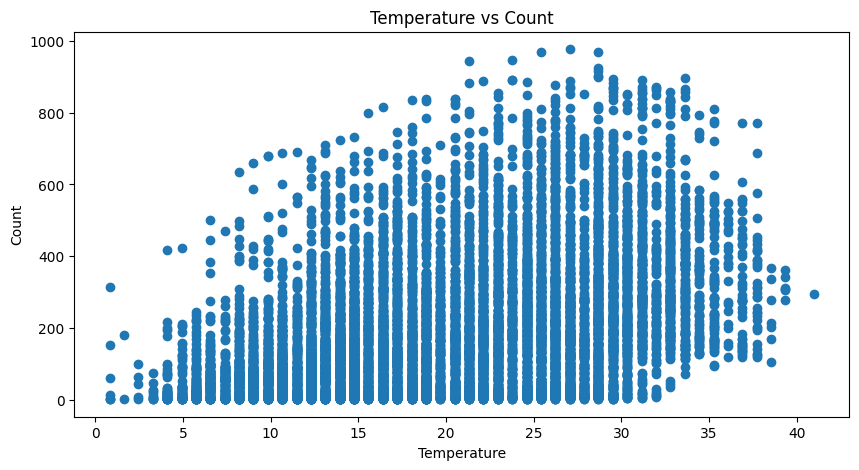

In [ ]:
#Scatter Plot
plt.figure(figsize=(10,5))
plt.scatter(df['temp'],df['count'])
plt.title('Temperature vs Count')
plt.xlabel('Temperature')
plt.ylabel('Count')
plt.show()

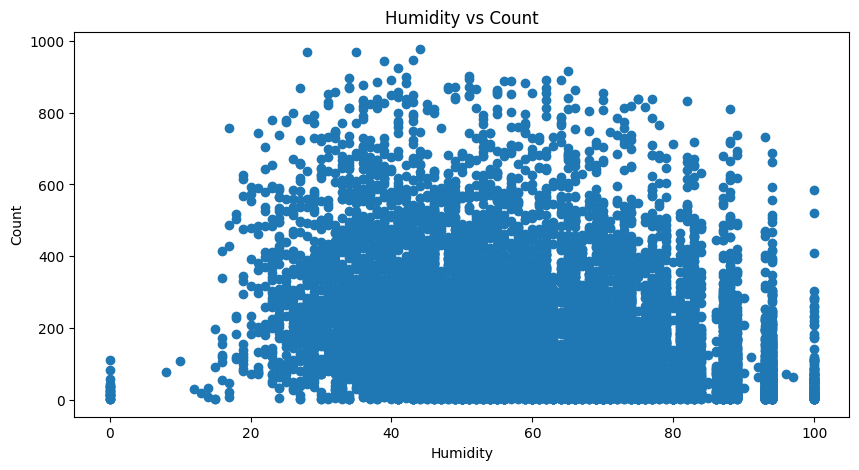

In [ ]:
plt.figure(figsize=(10,5))
plt.scatter(df['humidity'],df['count'])
plt.title('Humidity vs Count')
plt.xlabel('Humidity')
plt.ylabel('Count')
plt.show()


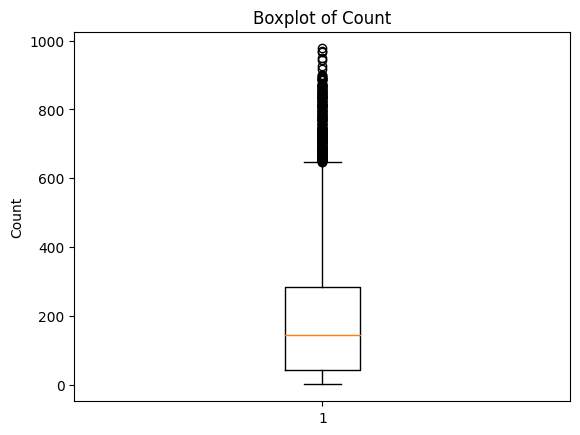

In [ ]:
plt.boxplot(df['count'])
plt.title('Boxplot of Count')
plt.ylabel('Count')
plt.show()

Box Plot Analysis

Median value around 100

Contains many outliers

In [ ]:
df_num=df.drop(['datetime'],axis=1)
df_num.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,1,0,0,1,9.84,14.395,75,0.0,0,1,1


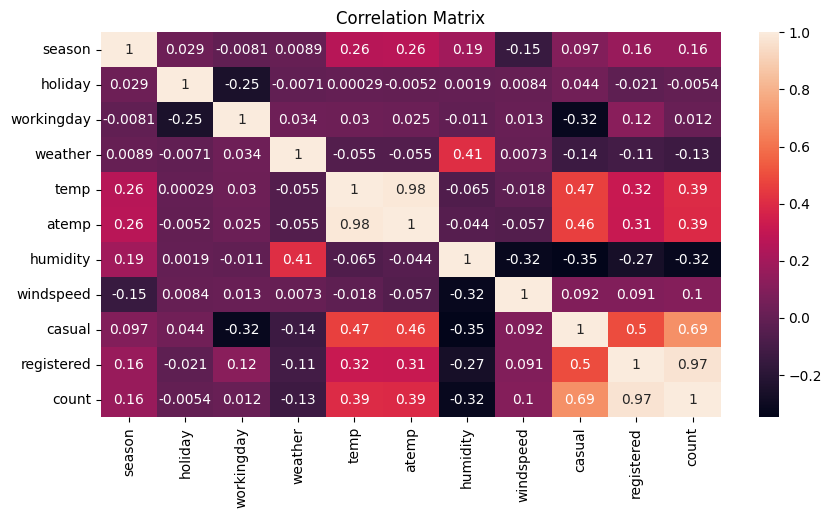

In [ ]:
correlation=df_num.corr()
plt.figure(figsize=(10,5))
sns.heatmap(correlation,annot=True)
plt.title('Correlation Matrix')
plt.show()

In [ ]:
#Shapiro-Wilk test for checking the normality of dependent variable
from scipy.stats import shapiro

stat, p_value = shapiro(df['count'])
print(f"Shapiro-Wilk Test Statistic: {stat}, p-value: {p_value}")

if p_value > 0.05:
    print("Data is normally distributed (Fail to reject H0)")
else:
    print("Data is not normally distributed (Reject H0)")


Shapiro-Wilk Test Statistic: 0.8783658962690556, p-value: 5.369837893115507e-68
Data is not normally distributed (Reject H0)


/usr/local/lib/python3.10/dist-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 10886.
  res = hypotest_fun_out(*samples, **kwds)


In [ ]:
#Levene's Test for checking the variace between different groups is equal
#Levene's test for working day
from scipy.stats import levene

stat, p_value = levene(df[df['workingday'] == 1]['count'],
                       df[df['workingday'] == 0]['count'])

print(f"Levene’s Test Statistic: {stat}, p-value: {p_value}")

if p_value > 0.05:
    print("Equal variances (Fail to reject H0)")
else:
    print("Unequal variances (Reject H0)")


Levene’s Test Statistic: 0.004972848886504472, p-value: 0.9437823280916695
Equal variances (Fail to reject H0)


In [ ]:
#Levene's test for seasons
from scipy.stats import levene

stat, p_value = levene(df[df['season'] == 1]['count'],
                       df[df['season'] == 2]['count'],
                       df[df['season'] == 3]['count'],
                       df[df['season'] == 4]['count'])

print(f"Levene’s Test Statistic: {stat}, p-value: {p_value}")

if p_value > 0.05:
    print("Equal variances (Fail to reject H0)")
else:
    print("Unequal variances (Reject H0)")


Levene’s Test Statistic: 187.7706624026276, p-value: 1.0147116860043298e-118
Unequal variances (Reject H0)


In [ ]:
#Levene's Test for weather
from scipy.stats import levene

stat, p_value = levene(df[df['weather'] == 1]['count'],
                       df[df['weather'] == 2]['count'],
                       df[df['weather'] == 3]['count'],
                       df[df['weather'] == 4]['count'])

print(f"Levene’s Test Statistic: {stat}, p-value: {p_value}")

if p_value > 0.05:
    print("Equal variances (Fail to reject H0)")
else:
    print("Unequal variances (Reject H0)")


Levene’s Test Statistic: 54.85106195954556, p-value: 3.504937946833238e-35
Unequal variances (Reject H0)


Correlation Matrix Insights

1. Positive Correlation

    registered and count
    
    count and casual

    casual and registered

    casual and temp

3. Negative Correlation

    Count and Humidity

    count and weather

    count and holiday

    registered and humidity

    casual and humidity

Hypothesis Testing
1. 2- Sample T-Test to check if Working Day has an effect on the number of electric cycles rented

Null Hypothesis (H0): Working day has no effect on the number of electric cycles rented.

Alternative Hypothesis (H1): Working day has an effect on the number of electric cycles rented.

In [ ]:
from scipy import stats
t_stat,p_value=stats.ttest_ind(df[df['workingday']==1]['count'],df[df['workingday']==0]['count'])
print('t-statistic:',t_stat)
print('p-value:',p_value)
alpha=0.05
if p_value<alpha:
  print('Reject the null hypothesis')
else:
  print('Fail to reject the null hypothesis')

t-statistic: 1.2096277376026694
p-value: 0.22644804226361348
Fail to reject the null hypothesis


2 sample T-test gave the p- value as 0.226 which is greater than the level of significance (0.05). So We Fail to Reject the null hypothesis. that is,

##Working day has an effect on the number of electric cycles rented

ANNOVA to check if No. of cycles rented is similar or different in different
1. Season

Null Hypothesis (H0): The number of electric cycles rented is the same across all seasons.

Alternative Hypothesis (H1): The number of electric cycles rented is different across seasons.

In [ ]:
season1=df[df['season']==1]['count']
season2=df[df['season']==2]['count']
season3=df[df['season']==3]['count']
season4=df[df['season']==4]['count']

f_stat,p_value=stats.f_oneway(season1,season2,season3,season4)
print('f-statistic:',f_stat)
print('p-value:',p_value)

alpha=0.05
if p_value<alpha:
  print('Reject the null hypothesis')
else:
  print('Fail to reject the null hypothesis')

f-statistic: 236.94671081032106
p-value: 6.164843386499654e-149
Reject the null hypothesis


Here We got the p-value as 6.16484...*e^-149 which is significantly lower than aplha 0.05. So we reject the null hypothesis.
that is,

##The number of electric cycles rented is different across seasons

ANNOVA to check if No. of cycles rented is similar or different in different
2. weather

Null Hypothesis (H0): The number of electric cycles rented is the same across different weather conditions.

Alternative Hypothesis (H1): The number of electric cycles rented is different across weather conditions.

In [ ]:
weather1=df[df['weather']==1]['count']
weather2=df[df['weather']==2]['count']
weather3=df[df['weather']==3]['count']
weather4=df[df['weather']==4]['count']

f_stat,p_value=stats.f_oneway(weather1,weather2,weather3,weather4)
print('f-statistic:',f_stat)
print('p-value:',p_value)

alpha=0.05
if p_value<alpha:
  print('Reject the null hypothesis')
else:
  print('Fail to reject the null hypothesis')

f-statistic: 65.53024112793271
p-value: 5.482069475935669e-42
Reject the null hypothesis


Here also we got p-value as 4.97644...*e^-43 which is less than alpha(0.05). So we reject the null Hypothesis.

i.e,

##The number of electric cycles rented is different across weather conditions

Chi-square test to check if Weather is dependent on the season

Null Hypothesis (H0): Weather is independent of season.

Alternative Hypothesis (H1): Weather is dependent on season.

In [ ]:
contingency_table=pd.crosstab(df['season'],df['weather'])
chi2_stat,p_value,dof,expected=stats.chi2_contingency(contingency_table)
print('Chi-square statistic:',chi2_stat)
print('p-value:',p_value)
print('Degrees of freedom:',dof)
print('Expected frequencies:',expected)
alpha=0.05
if p_value<alpha:
  print('Reject the null hypothesis')
else:
  print('Fail to reject the null hypothesis')

Chi-square statistic: 49.158655596893624
p-value: 1.549925073686492e-07
Degrees of freedom: 9
Expected frequencies: [[1.77454639e+03 6.99258130e+02 2.11948742e+02 2.46738931e-01]
 [1.80559765e+03 7.11493845e+02 2.15657450e+02 2.51056403e-01]
 [1.80559765e+03 7.11493845e+02 2.15657450e+02 2.51056403e-01]
 [1.80625831e+03 7.11754180e+02 2.15736359e+02 2.51148264e-01]]
Reject the null hypothesis


From Chi-square test, we got to know that the p-value is 1.549925...*e^-07 which is less than alpha, 0.05 so we reject the null hypothesis.
i,e

##Weather is Dependent on Season

#Final Insights I got from the data

Total Rentals - 2085476

Total Rentals in 2011 - 781979

Total Rentals in 2012 - 1303497

Rentals were high in Fall season and
the lowest rentals were at spring season

Highest Rentals were shown in the weather "Clear, Few clouds, partly cloudy, partly cloudy"

The lowest rentals recorded were in the weather " Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog".

Rentals were high on working days and low on Holidays or weekends

The Rentals were high when humidity is low and vice versa

Working day has en effect on the number of cycles rented

The number of electric cycles rented is different across seasons.

The number of electric cycles rented is different across weather conditions

Weather is Dependent on Season

